In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Inches,Ram,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,71378.6832,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,47895.5232,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,30636.0000,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,135195.3360,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,96095.8080,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
#Final dataset check

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Columns: 338 entries, Inches to OpSys_macOS
dtypes: bool(334), float64(3), int64(1)
memory usage: 465.3 KB


In [119]:
# =====================================
# PART C: Multiple Linear Regression
# Using RAM and Weight to predict Price
# =====================================

In [120]:
#Prepare features

In [121]:
ram = df_original["Ram"].str.replace("GB","").astype(int).values
weight = df_original["Weight"].str.replace("kg","").astype(float).values
y = df_original["Price"].values

In [122]:
#Feature matrix X

In [123]:
X = np.column_stack((ram, weight))

print("Shape of X:", X.shape)

Shape of X: (1303, 2)


In [124]:
#Add bias column

In [125]:
# add column of 1s
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

In [126]:
# Price=b0+b1∗RAM+b2∗Weight

In [127]:
#Normal equation

In [128]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print("Coefficients:", theta)

Coefficients: [22199.46419495  5689.07517439 -4913.02931662]


In [129]:
#Predictions

In [130]:
y_pred = X @ theta

In [131]:
#MSE

In [132]:
mse = np.mean((y - y_pred)**2)
print("MSE:", mse)

MSE: 611734216.3008236


In [133]:
#RMSE

In [134]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 24733.26133571599


In [135]:
#R²

In [136]:
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)

r2 = 1 - (ss_res/ss_tot)
print("R2:", r2)

R2: 0.5586306369362308


In [137]:
#Plot actual vs predicted

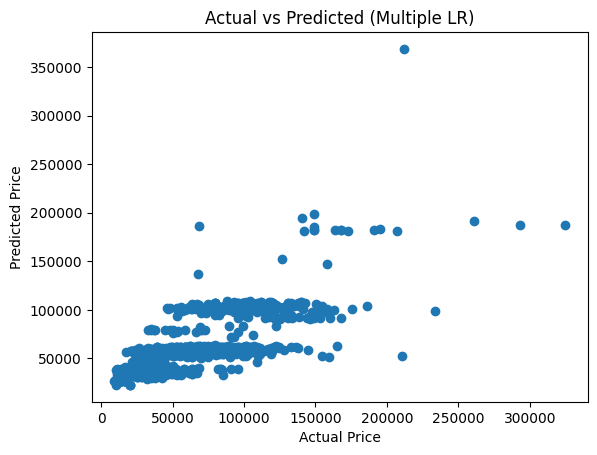

In [138]:
plt.scatter(y, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Multiple LR)")
plt.show()

In [139]:
#Coefficient interpretation

In [140]:
print("Intercept:", theta[0])
print("RAM coefficient:", theta[1])
print("Weight coefficient:", theta[2])

Intercept: 22199.464194949695
RAM coefficient: 5689.075174391624
Weight coefficient: -4913.029316621229


In [141]:
# =========================================
# Multiple Linear Regression using Gradient Descent
# =========================================

In [142]:
#Prepare features

In [143]:
ram = df_original["Ram"].str.replace("GB","").astype(int).values
weight = df_original["Weight"].str.replace("kg","").astype(float).values
y = df_original["Price"].values

In [144]:
#Normalize

In [145]:
ram = (ram - ram.mean())/ram.std()
weight = (weight - weight.mean())/weight.std()
y = (y - y.mean())/y.std()

In [146]:
#X matrix

In [147]:
X = np.column_stack((ram, weight))

# add bias column
X = np.c_[np.ones(len(X)), X]

In [148]:
#Initialize

In [149]:
theta = np.zeros(X.shape[1])

lr = 0.01
epochs = 1000
n = len(y)

cost_list = []

In [150]:
#Gradient Descent loop

In [151]:
for i in range(epochs):
    
    y_pred = X @ theta
    
    cost = (1/n)*np.sum((y - y_pred)**2)
    cost_list.append(cost)

    gradient = (-2/n)*(X.T @ (y - y_pred))
    
    theta = theta - lr*gradient
    
    if i % 100 == 0:
        print(f"Epoch {i}, Cost {cost}")

Epoch 0, Cost 1.0
Epoch 100, Cost 0.46185127454951547
Epoch 200, Cost 0.44298892766024994
Epoch 300, Cost 0.44150466572834773
Epoch 400, Cost 0.4413806945759852
Epoch 500, Cost 0.44137031217303446
Epoch 600, Cost 0.4413694425600103
Epoch 700, Cost 0.44136936972227936
Epoch 800, Cost 0.44136936362147805
Epoch 900, Cost 0.44136936311048225


In [152]:
#Final theta

In [153]:
print("Final coefficients:", theta)

Final coefficients: [ 2.19837792e-17  7.76704789e-01 -8.77859501e-02]


In [154]:
#Cost graph

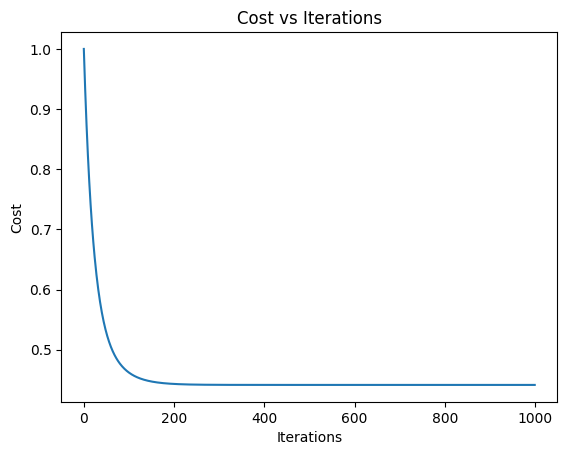

In [155]:
plt.plot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

In [156]:
#R²

In [157]:
y_pred = X @ theta

ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2

r2 = 1 - ss_res/ss_tot
print("R2:", r2)

R2: 0.5586306369323182
